In [37]:
import sys
import os

import numpy as np
from numpy import save
from numpy import load
import random
import pandas as pd

from glob import glob
import seaborn as sns
from matplotlib import pylab as plt

from scipy.spatial.distance import squareform
from scipy.stats import ttest_ind

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from numba import jit
from tqdm import tqdm

from joblib import Parallel, delayed, parallel_backend

sns.set_style('ticks')
sns.set_context('talk')

%run Funx_Simon.py
%run Classifier_Funx.py

# Load Data OB MICE

#  Mouse #513 day 0

In [4]:
FOLDER_PATH_plane_0 = "/Volumes/WD_BLACK/Simon/20210816_phase2_passive/513/Analysis/Plane_0"
FOLDER_PATH_plane_1 = "/Volumes/WD_BLACK/Simon/20210816_phase2_passive/513/Analysis/Plane_1"
FOLDER_PATH_plane_2 = "/Volumes/WD_BLACK/Simon/20210816_phase2_passive/513/Analysis/Plane_2"

filteredDataArraypath_0 = os.path.join(FOLDER_PATH_plane_0, "filteredDataArray.npy")
DataArray_Redpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Red.npy")
DataArray_Greenpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Green.npy")

filteredDataArraypath_1 = os.path.join(FOLDER_PATH_plane_1, "filteredDataArray.npy")
DataArray_Redpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Red.npy")
DataArray_Greenpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Green.npy")

filteredDataArraypath_2 = os.path.join(FOLDER_PATH_plane_2, "filteredDataArray.npy")
DataArray_Redpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Red.npy")
DataArray_Greenpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Green.npy")

filteredDataArray0 = load(filteredDataArraypath_0)
filteredDataArray1 = load(filteredDataArraypath_1)
filteredDataArray2 = load(filteredDataArraypath_2)
filteredDataArray_Day0_513= np.concatenate((filteredDataArray0, filteredDataArray1, filteredDataArray2), axis = 0)

DataArray_Red0 = load(DataArray_Redpath_0)
DataArray_Red1 = load(DataArray_Redpath_1)
DataArray_Red2 = load(DataArray_Redpath_2)
DataArray_Red_Day0_513 = np.concatenate((DataArray_Red0,DataArray_Red1, DataArray_Red2), axis = 0)

DataArray_Green0 = load(DataArray_Greenpath_0)
DataArray_Green1 = load(DataArray_Greenpath_1)
DataArray_Green2 = load(DataArray_Greenpath_2)
DataArray_Green_Day0_513= np.concatenate((DataArray_Green0, DataArray_Green1, DataArray_Green2), axis =0)


#  Mouse #513 day 1

In [5]:
FOLDER_PATH_plane_0 = "/Volumes/WD_BLACK/Simon/20210817_phase3_day1/513/Analysis/Plane_0"
FOLDER_PATH_plane_1 = "/Volumes/WD_BLACK/Simon/20210817_phase3_day1/513/Analysis/Plane_1"
FOLDER_PATH_plane_2 = "/Volumes/WD_BLACK/Simon/20210817_phase3_day1/513/Analysis/Plane_2"

filteredDataArraypath_0 = os.path.join(FOLDER_PATH_plane_0, "filteredDataArray.npy")
DataArray_Redpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Red.npy")
DataArray_Greenpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Green.npy")

filteredDataArraypath_1 = os.path.join(FOLDER_PATH_plane_1, "filteredDataArray.npy")
DataArray_Redpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Red.npy")
DataArray_Greenpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Green.npy")

filteredDataArraypath_2 = os.path.join(FOLDER_PATH_plane_2, "filteredDataArray.npy")
DataArray_Redpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Red.npy")
DataArray_Greenpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Green.npy")

filteredDataArray0 = load(filteredDataArraypath_0)
filteredDataArray1 = load(filteredDataArraypath_1)
filteredDataArray2 = load(filteredDataArraypath_2)
filteredDataArray_Day1_513= np.concatenate((filteredDataArray0, filteredDataArray1, filteredDataArray2), axis = 0)

DataArray_Red0 = load(DataArray_Redpath_0)
DataArray_Red1 = load(DataArray_Redpath_1)
DataArray_Red2 = load(DataArray_Redpath_2)
DataArray_Red_Day1_513 = np.concatenate((DataArray_Red0,DataArray_Red1, DataArray_Red2), axis = 0)

DataArray_Green0 = load(DataArray_Greenpath_0)
DataArray_Green1 = load(DataArray_Greenpath_1)
DataArray_Green2 = load(DataArray_Greenpath_2)
DataArray_Green_Day1_513= np.concatenate((DataArray_Green0, DataArray_Green1, DataArray_Green2), axis =0)


#  Mouse #513 day 2

In [6]:
FOLDER_PATH_plane_0 = "/Volumes/WD_BLACK/Simon/20210818_phase3_day2/513/Analysis/Plane_0"
FOLDER_PATH_plane_1 = "/Volumes/WD_BLACK/Simon/20210818_phase3_day2/513/Analysis/Plane_1"
FOLDER_PATH_plane_2 = "/Volumes/WD_BLACK/Simon/20210818_phase3_day2/513/Analysis/Plane_2"

filteredDataArraypath_0 = os.path.join(FOLDER_PATH_plane_0, "filteredDataArray.npy")
DataArray_Redpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Red.npy")
DataArray_Greenpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Green.npy")

filteredDataArraypath_1 = os.path.join(FOLDER_PATH_plane_1, "filteredDataArray.npy")
DataArray_Redpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Red.npy")
DataArray_Greenpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Green.npy")

filteredDataArraypath_2 = os.path.join(FOLDER_PATH_plane_2, "filteredDataArray.npy")
DataArray_Redpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Red.npy")
DataArray_Greenpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Green.npy")

filteredDataArray0 = load(filteredDataArraypath_0)
filteredDataArray1 = load(filteredDataArraypath_1)
filteredDataArray2 = load(filteredDataArraypath_2)
filteredDataArray0 = filteredDataArray0.transpose(0,2,1,3)
# filteredDataArray1 = filteredDataArray1.transpose(2,1,0,3)
# filteredDataArray2 = filteredDataArray2.transpose(2,1,0,3)
filteredDataArray_Day2_513= np.concatenate((filteredDataArray0, filteredDataArray1, filteredDataArray2), axis = 0)

DataArray_Red0 = load(DataArray_Redpath_0)
DataArray_Red1 = load(DataArray_Redpath_1)
DataArray_Red2 = load(DataArray_Redpath_2)
DataArray_Red_Day2_513 = np.concatenate((DataArray_Red0,DataArray_Red1, DataArray_Red2), axis = 0)

DataArray_Green0 = load(DataArray_Greenpath_0)
DataArray_Green1 = load(DataArray_Greenpath_1)
DataArray_Green2 = load(DataArray_Greenpath_2)
DataArray_Green_Day2_513= np.concatenate((DataArray_Green0, DataArray_Green1, DataArray_Green2), axis =0)


#  Mouse #513 day 3

In [7]:
FOLDER_PATH_plane_0 = "/Volumes/WD_BLACK/Simon/20210819_phase3_day3/513/Analysis/Plane_0"
FOLDER_PATH_plane_1 = "/Volumes/WD_BLACK/Simon/20210819_phase3_day3/513/Analysis/Plane_1"
FOLDER_PATH_plane_2 = "/Volumes/WD_BLACK/Simon/20210819_phase3_day3/513/Analysis/Plane_2"

filteredDataArraypath_0 = os.path.join(FOLDER_PATH_plane_0, "filteredDataArray.npy")
DataArray_Redpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Red.npy")
DataArray_Greenpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Green.npy")

filteredDataArraypath_1 = os.path.join(FOLDER_PATH_plane_1, "filteredDataArray.npy")
DataArray_Redpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Red.npy")
DataArray_Greenpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Green.npy")

filteredDataArraypath_2 = os.path.join(FOLDER_PATH_plane_2, "filteredDataArray.npy")
DataArray_Redpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Red.npy")
DataArray_Greenpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Green.npy")

filteredDataArray0 = load(filteredDataArraypath_0)
filteredDataArray1 = load(filteredDataArraypath_1)
filteredDataArray2 = load(filteredDataArraypath_2)
# filteredDataArray0 = filteredDataArray0.transpose(2,1,0,3)
# filteredDataArray1 = filteredDataArray1.transpose(2,1,0,3)
# filteredDataArray2 = filteredDataArray2.transpose(2,1,0,3)
filteredDataArray_Day3_513= np.concatenate((filteredDataArray0, filteredDataArray1, filteredDataArray2), axis = 0)

DataArray_Red0 = load(DataArray_Redpath_0)
DataArray_Red1 = load(DataArray_Redpath_1)
DataArray_Red2 = load(DataArray_Redpath_2)
DataArray_Red_Day3_513 = np.concatenate((DataArray_Red0,DataArray_Red1, DataArray_Red2), axis = 0)

DataArray_Green0 = load(DataArray_Greenpath_0)
DataArray_Green1 = load(DataArray_Greenpath_1)
DataArray_Green2 = load(DataArray_Greenpath_2)
DataArray_Green_Day3_513= np.concatenate((DataArray_Green0, DataArray_Green1, DataArray_Green2), axis =0)




#  Mouse #664 day 0

In [8]:
FOLDER_PATH_plane_0 = "/Volumes/WD_BLACK/Simon/20210816_phase2_passive/664/Analysis/Plane_0"
FOLDER_PATH_plane_1 = "/Volumes/WD_BLACK/Simon/20210816_phase2_passive/664/Analysis/Plane_1"
FOLDER_PATH_plane_2 = "/Volumes/WD_BLACK/Simon/20210816_phase2_passive/664/Analysis/Plane_2"

filteredDataArraypath_0 = os.path.join(FOLDER_PATH_plane_0, "filteredDataArray.npy")
DataArray_Redpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Red.npy")
DataArray_Greenpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Green.npy")

filteredDataArraypath_1 = os.path.join(FOLDER_PATH_plane_1, "filteredDataArray.npy")
DataArray_Redpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Red.npy")
DataArray_Greenpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Green.npy")

filteredDataArraypath_2 = os.path.join(FOLDER_PATH_plane_2, "filteredDataArray.npy")
DataArray_Redpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Red.npy")
DataArray_Greenpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Green.npy")

filteredDataArray0 = load(filteredDataArraypath_0)
filteredDataArray1 = load(filteredDataArraypath_1)
filteredDataArray2 = load(filteredDataArraypath_2)
filteredDataArray_Day0_664= np.concatenate((filteredDataArray0, filteredDataArray1, filteredDataArray2), axis = 0)

DataArray_Red0 = load(DataArray_Redpath_0)
DataArray_Red1 = load(DataArray_Redpath_1)
DataArray_Red2 = load(DataArray_Redpath_2)
DataArray_Red_Day0_664 = np.concatenate((DataArray_Red0,DataArray_Red1, DataArray_Red2), axis = 0)

DataArray_Green0 = load(DataArray_Greenpath_0)
DataArray_Green1 = load(DataArray_Greenpath_1)
DataArray_Green2 = load(DataArray_Greenpath_2)
DataArray_Green_Day0_664= np.concatenate((DataArray_Green0, DataArray_Green1, DataArray_Green2), axis =0)

#  Mouse #664 day 1

In [9]:
FOLDER_PATH_plane_0 = "/Volumes/WD_BLACK/Simon/20210817_phase3_day1/664/Analysis/Plane_0"
FOLDER_PATH_plane_1 = "/Volumes/WD_BLACK/Simon/20210817_phase3_day1/664/Analysis/Plane_1"
FOLDER_PATH_plane_2 = "/Volumes/WD_BLACK/Simon/20210817_phase3_day1/664/Analysis/Plane_2"

filteredDataArraypath_0 = os.path.join(FOLDER_PATH_plane_0, "filteredDataArray.npy")
DataArray_Redpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Red.npy")
DataArray_Greenpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Green.npy")

filteredDataArraypath_1 = os.path.join(FOLDER_PATH_plane_1, "filteredDataArray.npy")
DataArray_Redpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Red.npy")
DataArray_Greenpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Green.npy")

filteredDataArraypath_2 = os.path.join(FOLDER_PATH_plane_2, "filteredDataArray.npy")
DataArray_Redpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Red.npy")
DataArray_Greenpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Green.npy")

filteredDataArray0 = load(filteredDataArraypath_0)
filteredDataArray1 = load(filteredDataArraypath_1)
filteredDataArray2 = load(filteredDataArraypath_2)
filteredDataArray_Day1_664= np.concatenate((filteredDataArray0, filteredDataArray1, filteredDataArray2), axis = 0)

DataArray_Red0 = load(DataArray_Redpath_0)
DataArray_Red1 = load(DataArray_Redpath_1)
DataArray_Red2 = load(DataArray_Redpath_2)
DataArray_Red_Day1_664 = np.concatenate((DataArray_Red0,DataArray_Red1, DataArray_Red2), axis = 0)

DataArray_Green0 = load(DataArray_Greenpath_0)
DataArray_Green1 = load(DataArray_Greenpath_1)
DataArray_Green2 = load(DataArray_Greenpath_2)
DataArray_Green_Day1_664= np.concatenate((DataArray_Green0, DataArray_Green1, DataArray_Green2), axis =0)

#  Mouse #664 day 2

In [10]:
FOLDER_PATH_plane_0 = "/Volumes/WD_BLACK/Simon/20210818_phase3_day2/664/Analysis/Plane_0"
FOLDER_PATH_plane_1 = "/Volumes/WD_BLACK/Simon/20210818_phase3_day2/664/Analysis/Plane_1"
FOLDER_PATH_plane_2 = "/Volumes/WD_BLACK/Simon/20210818_phase3_day2/664/Analysis/Plane_2"

filteredDataArraypath_0 = os.path.join(FOLDER_PATH_plane_0, "filteredDataArray.npy")
DataArray_Redpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Red.npy")
DataArray_Greenpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Green.npy")

filteredDataArraypath_1 = os.path.join(FOLDER_PATH_plane_1, "filteredDataArray.npy")
DataArray_Redpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Red.npy")
DataArray_Greenpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Green.npy")

filteredDataArraypath_2 = os.path.join(FOLDER_PATH_plane_2, "filteredDataArray.npy")
DataArray_Redpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Red.npy")
DataArray_Greenpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Green.npy")


filteredDataArray0 = load(filteredDataArraypath_0)
filteredDataArray1 = load(filteredDataArraypath_1)
filteredDataArray2 = load(filteredDataArraypath_2)
# filteredDataArray0 = filteredDataArray0.transpose(0,2,1,3)
filteredDataArray1 = filteredDataArray1.transpose(0,2,1,3)
# filteredDataArray2 = filteredDataArray2.transpose(0,2,1,3)
filteredDataArray_Day2_664= np.concatenate((filteredDataArray0, filteredDataArray1, filteredDataArray2), axis = 0)

DataArray_Red0 = load(DataArray_Redpath_0)
DataArray_Red1 = load(DataArray_Redpath_1)
DataArray_Red2 = load(DataArray_Redpath_2)
DataArray_Red_Day2_664 = np.concatenate((DataArray_Red0,DataArray_Red1, DataArray_Red2), axis = 0)

DataArray_Green0 = load(DataArray_Greenpath_0)
DataArray_Green1 = load(DataArray_Greenpath_1)
DataArray_Green2 = load(DataArray_Greenpath_2)
DataArray_Green_Day2_664= np.concatenate((DataArray_Green0, DataArray_Green1, DataArray_Green2), axis =0)

#  Mouse #664 day 3

In [11]:
FOLDER_PATH_plane_0 = "/Volumes/WD_BLACK/Simon/20210819_phase3_day3/664/Analysis/Plane_0"
FOLDER_PATH_plane_1 = "/Volumes/WD_BLACK/Simon/20210819_phase3_day3/664/Analysis/Plane_1"
FOLDER_PATH_plane_2 = "/Volumes/WD_BLACK/Simon/20210819_phase3_day3/664/Analysis/Plane_2"

filteredDataArraypath_0 = os.path.join(FOLDER_PATH_plane_0, "filteredDataArray.npy")
DataArray_Redpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Red.npy")
DataArray_Greenpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Green.npy")

filteredDataArraypath_1 = os.path.join(FOLDER_PATH_plane_1, "filteredDataArray.npy")
DataArray_Redpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Red.npy")
DataArray_Greenpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Green.npy")

filteredDataArraypath_2 = os.path.join(FOLDER_PATH_plane_2, "filteredDataArray.npy")
DataArray_Redpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Red.npy")
DataArray_Greenpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Green.npy")

filteredDataArray0 = load(filteredDataArraypath_0)
filteredDataArray1 = load(filteredDataArraypath_1)
filteredDataArray2 = load(filteredDataArraypath_2)
filteredDataArray_Day3_664= np.concatenate((filteredDataArray0, filteredDataArray1, filteredDataArray2), axis = 0)

DataArray_Red0 = load(DataArray_Redpath_0)
DataArray_Red1 = load(DataArray_Redpath_1)
DataArray_Red2 = load(DataArray_Redpath_2)
DataArray_Red_Day3_664 = np.concatenate((DataArray_Red0,DataArray_Red1, DataArray_Red2), axis = 0)

DataArray_Green0 = load(DataArray_Greenpath_0)
DataArray_Green1 = load(DataArray_Greenpath_1)
DataArray_Green2 = load(DataArray_Greenpath_2)
DataArray_Green_Day3_664= np.concatenate((DataArray_Green0, DataArray_Green1, DataArray_Green2), axis =0)

# Remove trial excess to concatenate both mice

In [12]:
filteredDataArray_Day1_513 = filteredDataArray_Day1_513[:,0:17,:,:]
DataArray_Green_Day1_513 = DataArray_Green_Day1_513[:,0:17,:,:]
DataArray_Red_Day1_513 = DataArray_Red_Day1_513[:,0:17,:,:]

filteredDataArray_Day2_513 = filteredDataArray_Day2_513[:,0:17,:,:]
DataArray_Green_Day2_513 = DataArray_Green_Day2_513[:,0:17,:,:]
DataArray_Red_Day2_513 = DataArray_Red_Day2_513[:,0:17,:,:]

filteredDataArray_Day3_513 = filteredDataArray_Day3_513[:,0:9,:,:]
DataArray_Green_Day3_513 = DataArray_Green_Day3_513[:,0:9,:,:]
DataArray_Red_Day3_513 = DataArray_Red_Day3_513[:,0:9,:,:]


filteredDataArray_Day1_664 = filteredDataArray_Day1_664[:,0:17,:,:]
DataArray_Green_Day1_664 = DataArray_Green_Day1_664[:,0:17,:,:]
DataArray_Red_Day1_664 = DataArray_Red_Day1_664[:,0:17,:,:]

filteredDataArray_Day2_664 = filteredDataArray_Day2_664[:,0:17,:,:]
DataArray_Green_Day2_664 = DataArray_Green_Day2_664[:,0:17,:,:]
DataArray_Red_Day2_664 = DataArray_Red_Day2_664[:,0:17,:,:]

filteredDataArray_Day3_664 = filteredDataArray_Day3_664[:,0:9,:,:]
DataArray_Green_Day3_664 = DataArray_Green_Day3_664[:,0:9,:,:]
DataArray_Red_Day3_664 = DataArray_Red_Day3_664[:,0:9,:,:]

# Concatenate both mice for day 0 passive

In [13]:
filteredDataArray_Day0_OB= np.concatenate((filteredDataArray_Day0_513, filteredDataArray_Day0_664), axis =0)
DataArray_Green_Day0_OB= np.concatenate((DataArray_Green_Day0_513, DataArray_Green_Day0_664), axis =0)
DataArray_Red_Day0_OB= np.concatenate((DataArray_Red_Day0_513,DataArray_Red_Day0_664), axis = 0)

# Concatenate both mice OB GNG

In [14]:
filteredDataArray_Day1_OB= np.concatenate((filteredDataArray_Day1_513, filteredDataArray_Day1_664), axis =0)
DataArray_Green_Day1_OB= np.concatenate((DataArray_Green_Day1_513, DataArray_Green_Day1_664), axis =0)
DataArray_Red_Day1_OB= np.concatenate((DataArray_Red_Day1_513,DataArray_Red_Day1_664), axis = 0)

filteredDataArray_Day2_OB= np.concatenate((filteredDataArray_Day2_513, filteredDataArray_Day2_664), axis =0)
DataArray_Green_Day2_OB= np.concatenate((DataArray_Green_Day2_513, DataArray_Green_Day2_664), axis =0)
DataArray_Red_Day2_OB= np.concatenate((DataArray_Red_Day2_513,DataArray_Red_Day2_664), axis = 0)

filteredDataArray_Day3_OB= np.concatenate((filteredDataArray_Day3_513, filteredDataArray_Day3_664), axis =0)
DataArray_Green_Day3_OB= np.concatenate((DataArray_Green_Day3_513, DataArray_Green_Day3_664), axis =0)
DataArray_Red_Day3_OB= np.concatenate((DataArray_Red_Day3_513,DataArray_Red_Day3_664), axis = 0)

# Load Data mPFC MICE

# Mouse #644 day 0

In [15]:
FOLDER_PATH_plane_0 = "/Volumes/WD_BLACK/Simon/20210816_phase2_passive/644/Analysis/Plane_0"
FOLDER_PATH_plane_1 = "/Volumes/WD_BLACK/Simon/20210816_phase2_passive/644/Analysis/Plane_1"
FOLDER_PATH_plane_2 = "/Volumes/WD_BLACK/Simon/20210816_phase2_passive/644/Analysis/Plane_2"

filteredDataArraypath_0 = os.path.join(FOLDER_PATH_plane_0, "filteredDataArray.npy")
DataArray_Redpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Red.npy")
DataArray_Greenpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Green.npy")

filteredDataArraypath_1 = os.path.join(FOLDER_PATH_plane_1, "filteredDataArray.npy")
DataArray_Redpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Red.npy")
DataArray_Greenpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Green.npy")

filteredDataArraypath_2 = os.path.join(FOLDER_PATH_plane_2, "filteredDataArray.npy")
DataArray_Redpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Red.npy")
DataArray_Greenpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Green.npy")

filteredDataArray0 = load(filteredDataArraypath_0)
filteredDataArray1 = load(filteredDataArraypath_1)
filteredDataArray2 = load(filteredDataArraypath_2)
filteredDataArray_Day0_644= np.concatenate((filteredDataArray0, filteredDataArray1, filteredDataArray2), axis = 0)

DataArray_Red0 = load(DataArray_Redpath_0)
DataArray_Red1 = load(DataArray_Redpath_1)
DataArray_Red2 = load(DataArray_Redpath_2)
DataArray_Red_Day0_644 = np.concatenate((DataArray_Red0,DataArray_Red1, DataArray_Red2), axis = 0)

DataArray_Green0 = load(DataArray_Greenpath_0)
DataArray_Green1 = load(DataArray_Greenpath_1)
DataArray_Green2 = load(DataArray_Greenpath_2)
DataArray_Green_Day0_644= np.concatenate((DataArray_Green0, DataArray_Green1, DataArray_Green2), axis =0)

# Mouse #644 day 1

In [16]:
FOLDER_PATH_plane_0 = "/Volumes/WD_BLACK/Simon/20210817_phase3_day1/644/Analysis/Plane_0"
FOLDER_PATH_plane_1 = "/Volumes/WD_BLACK/Simon/20210817_phase3_day1/644/Analysis/Plane_1"
FOLDER_PATH_plane_2 = "/Volumes/WD_BLACK/Simon/20210817_phase3_day1/644/Analysis/Plane_2"

filteredDataArraypath_0 = os.path.join(FOLDER_PATH_plane_0, "filteredDataArray.npy")
DataArray_Redpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Red.npy")
DataArray_Greenpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Green.npy")

filteredDataArraypath_1 = os.path.join(FOLDER_PATH_plane_1, "filteredDataArray.npy")
DataArray_Redpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Red.npy")
DataArray_Greenpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Green.npy")

filteredDataArraypath_2 = os.path.join(FOLDER_PATH_plane_2, "filteredDataArray.npy")
DataArray_Redpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Red.npy")
DataArray_Greenpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Green.npy")

filteredDataArray0 = load(filteredDataArraypath_0)
filteredDataArray1 = load(filteredDataArraypath_1)
filteredDataArray2 = load(filteredDataArraypath_2)
filteredDataArray_Day1_644= np.concatenate((filteredDataArray0, filteredDataArray1, filteredDataArray2), axis = 0)

DataArray_Red0 = load(DataArray_Redpath_0)
DataArray_Red1 = load(DataArray_Redpath_1)
DataArray_Red2 = load(DataArray_Redpath_2)
DataArray_Red_Day1_644 = np.concatenate((DataArray_Red0,DataArray_Red1, DataArray_Red2), axis = 0)

DataArray_Green0 = load(DataArray_Greenpath_0)
DataArray_Green1 = load(DataArray_Greenpath_1)
DataArray_Green2 = load(DataArray_Greenpath_2)
DataArray_Green_Day1_644= np.concatenate((DataArray_Green0, DataArray_Green1, DataArray_Green2), axis =0)

# Mouse #644 day 2

In [17]:
FOLDER_PATH_plane_0 = "/Volumes/WD_BLACK/Simon/20210818_phase3_day2/644/Analysis/Plane_0"
FOLDER_PATH_plane_1 = "/Volumes/WD_BLACK/Simon/20210818_phase3_day2/644/Analysis/Plane_1"
FOLDER_PATH_plane_2 = "/Volumes/WD_BLACK/Simon/20210818_phase3_day2/644/Analysis/Plane_2"

filteredDataArraypath_0 = os.path.join(FOLDER_PATH_plane_0, "filteredDataArray.npy")
DataArray_Redpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Red.npy")
DataArray_Greenpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Green.npy")

filteredDataArraypath_1 = os.path.join(FOLDER_PATH_plane_1, "filteredDataArray.npy")
DataArray_Redpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Red.npy")
DataArray_Greenpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Green.npy")

filteredDataArraypath_2 = os.path.join(FOLDER_PATH_plane_2, "filteredDataArray.npy")
DataArray_Redpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Red.npy")
DataArray_Greenpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Green.npy")

filteredDataArray0 = load(filteredDataArraypath_0)
filteredDataArray1 = load(filteredDataArraypath_1)
filteredDataArray2 = load(filteredDataArraypath_2)
# filteredDataArray0 = filteredDataArray0.transpose(0,2,1,3)
# filteredDataArray1 = filteredDataArray1.transpose(0,2,1,3)
filteredDataArray2 = filteredDataArray2.transpose(0,2,1,3)
filteredDataArray_Day2_644= np.concatenate((filteredDataArray0, filteredDataArray1, filteredDataArray2), axis = 0)

DataArray_Red0 = load(DataArray_Redpath_0)
DataArray_Red1 = load(DataArray_Redpath_1)
DataArray_Red2 = load(DataArray_Redpath_2)
DataArray_Red_Day2_644 = np.concatenate((DataArray_Red0,DataArray_Red1, DataArray_Red2), axis = 0)

DataArray_Green0 = load(DataArray_Greenpath_0)
DataArray_Green1 = load(DataArray_Greenpath_1)
DataArray_Green2 = load(DataArray_Greenpath_2)
DataArray_Green_Day2_644= np.concatenate((DataArray_Green0, DataArray_Green1, DataArray_Green2), axis =0)

# Mouse #644 day 3

In [18]:
FOLDER_PATH_plane_0 = "/Volumes/WD_BLACK/Simon/20210819_phase3_day3/644/Analysis/Plane_0"
FOLDER_PATH_plane_1 = "/Volumes/WD_BLACK/Simon/20210819_phase3_day3/644/Analysis/Plane_1"
FOLDER_PATH_plane_2 = "/Volumes/WD_BLACK/Simon/20210819_phase3_day3/644/Analysis/Plane_2"

filteredDataArraypath_0 = os.path.join(FOLDER_PATH_plane_0, "filteredDataArray.npy")
DataArray_Redpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Red.npy")
DataArray_Greenpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Green.npy")

filteredDataArraypath_1 = os.path.join(FOLDER_PATH_plane_1, "filteredDataArray.npy")
DataArray_Redpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Red.npy")
DataArray_Greenpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Green.npy")

filteredDataArraypath_2 = os.path.join(FOLDER_PATH_plane_2, "filteredDataArray.npy")
DataArray_Redpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Red.npy")
DataArray_Greenpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Green.npy")

filteredDataArray0 = load(filteredDataArraypath_0)
filteredDataArray1 = load(filteredDataArraypath_1)
filteredDataArray2 = load(filteredDataArraypath_2)
filteredDataArray_Day3_644= np.concatenate((filteredDataArray0, filteredDataArray1, filteredDataArray2), axis = 0)

DataArray_Red0 = load(DataArray_Redpath_0)
DataArray_Red1 = load(DataArray_Redpath_1)
DataArray_Red2 = load(DataArray_Redpath_2)
DataArray_Red_Day3_644 = np.concatenate((DataArray_Red0,DataArray_Red1, DataArray_Red2), axis = 0)

DataArray_Green0 = load(DataArray_Greenpath_0)
DataArray_Green1 = load(DataArray_Greenpath_1)
DataArray_Green2 = load(DataArray_Greenpath_2)
DataArray_Green_Day3_644= np.concatenate((DataArray_Green0, DataArray_Green1, DataArray_Green2), axis =0)

# Mouse #668 day 0

In [19]:
FOLDER_PATH_plane_0 = "/Volumes/WD_BLACK/Simon/20210816_phase2_passive/668/Analysis/Plane_0"
FOLDER_PATH_plane_1 = "/Volumes/WD_BLACK/Simon/20210816_phase2_passive/668/Analysis/Plane_1"
FOLDER_PATH_plane_2 = "/Volumes/WD_BLACK/Simon/20210816_phase2_passive/668/Analysis/Plane_2"

filteredDataArraypath_0 = os.path.join(FOLDER_PATH_plane_0, "filteredDataArray.npy")
DataArray_Redpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Red.npy")
DataArray_Greenpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Green.npy")

filteredDataArraypath_1 = os.path.join(FOLDER_PATH_plane_1, "filteredDataArray.npy")
DataArray_Redpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Red.npy")
DataArray_Greenpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Green.npy")

filteredDataArraypath_2 = os.path.join(FOLDER_PATH_plane_2, "filteredDataArray.npy")
DataArray_Redpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Red.npy")
DataArray_Greenpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Green.npy")

filteredDataArray0 = load(filteredDataArraypath_0)
filteredDataArray1 = load(filteredDataArraypath_1)
filteredDataArray2 = load(filteredDataArraypath_2)
filteredDataArray_Day0_668= np.concatenate((filteredDataArray0, filteredDataArray1, filteredDataArray2), axis = 0)

DataArray_Red0 = load(DataArray_Redpath_0)
DataArray_Red1 = load(DataArray_Redpath_1)
DataArray_Red2 = load(DataArray_Redpath_2)
DataArray_Red_Day0_668= np.concatenate((DataArray_Red0,DataArray_Red1, DataArray_Red2), axis = 0)

DataArray_Green0 = load(DataArray_Greenpath_0)
DataArray_Green1 = load(DataArray_Greenpath_1)
DataArray_Green2 = load(DataArray_Greenpath_2)
DataArray_Green_Day0_668= np.concatenate((DataArray_Green0, DataArray_Green1, DataArray_Green2), axis =0)

# Mouse #668 day 1

In [20]:
FOLDER_PATH_plane_0 = "/Volumes/WD_BLACK/Simon/20210817_phase3_day1/668/Analysis/Plane_0"
FOLDER_PATH_plane_1 = "/Volumes/WD_BLACK/Simon/20210817_phase3_day1/668/Analysis/Plane_1"
FOLDER_PATH_plane_2 = "/Volumes/WD_BLACK/Simon/20210817_phase3_day1/668/Analysis/Plane_2"

filteredDataArraypath_0 = os.path.join(FOLDER_PATH_plane_0, "filteredDataArray.npy")
DataArray_Redpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Red.npy")
DataArray_Greenpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Green.npy")

filteredDataArraypath_1 = os.path.join(FOLDER_PATH_plane_1, "filteredDataArray.npy")
DataArray_Redpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Red.npy")
DataArray_Greenpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Green.npy")

filteredDataArraypath_2 = os.path.join(FOLDER_PATH_plane_2, "filteredDataArray.npy")
DataArray_Redpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Red.npy")
DataArray_Greenpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Green.npy")

filteredDataArray0 = load(filteredDataArraypath_0)
filteredDataArray1 = load(filteredDataArraypath_1)
filteredDataArray2 = load(filteredDataArraypath_2)
filteredDataArray_Day1_668= np.concatenate((filteredDataArray0, filteredDataArray1, filteredDataArray2), axis = 0)

DataArray_Red0 = load(DataArray_Redpath_0)
DataArray_Red1 = load(DataArray_Redpath_1)
DataArray_Red2 = load(DataArray_Redpath_2)
DataArray_Red_Day1_668 = np.concatenate((DataArray_Red0,DataArray_Red1, DataArray_Red2), axis = 0)

DataArray_Green0 = load(DataArray_Greenpath_0)
DataArray_Green1 = load(DataArray_Greenpath_1)
DataArray_Green2 = load(DataArray_Greenpath_2)
DataArray_Green_Day1_668= np.concatenate((DataArray_Green0, DataArray_Green1, DataArray_Green2), axis =0)

# Mouse #668 day 2

In [21]:
FOLDER_PATH_plane_0 = "/Volumes/WD_BLACK/Simon/20210818_phase3_day2/668/Analysis/Plane_0"
FOLDER_PATH_plane_1 = "/Volumes/WD_BLACK/Simon/20210818_phase3_day2/668/Analysis/Plane_1"
FOLDER_PATH_plane_2 = "/Volumes/WD_BLACK/Simon/20210818_phase3_day2/668/Analysis/Plane_2"

filteredDataArraypath_0 = os.path.join(FOLDER_PATH_plane_0, "filteredDataArray.npy")
DataArray_Redpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Red.npy")
DataArray_Greenpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Green.npy")

filteredDataArraypath_1 = os.path.join(FOLDER_PATH_plane_1, "filteredDataArray.npy")
DataArray_Redpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Red.npy")
DataArray_Greenpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Green.npy")

filteredDataArraypath_2 = os.path.join(FOLDER_PATH_plane_2, "filteredDataArray.npy")
DataArray_Redpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Red.npy")
DataArray_Greenpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Green.npy")

filteredDataArray0 = load(filteredDataArraypath_0)
filteredDataArray1 = load(filteredDataArraypath_1)
filteredDataArray2 = load(filteredDataArraypath_2)
filteredDataArray_Day2_668= np.concatenate((filteredDataArray0, filteredDataArray1, filteredDataArray2), axis = 0)

DataArray_Red0 = load(DataArray_Redpath_0)
DataArray_Red1 = load(DataArray_Redpath_1)
DataArray_Red2 = load(DataArray_Redpath_2)
DataArray_Red_Day2_668= np.concatenate((DataArray_Red0,DataArray_Red1, DataArray_Red2), axis = 0)

DataArray_Green0 = load(DataArray_Greenpath_0)
DataArray_Green1 = load(DataArray_Greenpath_1)
DataArray_Green2 = load(DataArray_Greenpath_2)
DataArray_Green_Day2_668= np.concatenate((DataArray_Green0, DataArray_Green1, DataArray_Green2), axis =0)

# Mouse #668 day 3

In [22]:
FOLDER_PATH_plane_0 = "/Volumes/WD_BLACK/Simon/20210819_phase3_day3/668/Analysis/Plane_0"
FOLDER_PATH_plane_1 = "/Volumes/WD_BLACK/Simon/20210819_phase3_day3/668/Analysis/Plane_1"
FOLDER_PATH_plane_2 = "/Volumes/WD_BLACK/Simon/20210819_phase3_day3/668/Analysis/Plane_2"

filteredDataArraypath_0 = os.path.join(FOLDER_PATH_plane_0, "filteredDataArray.npy")
DataArray_Redpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Red.npy")
DataArray_Greenpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Green.npy")

filteredDataArraypath_1 = os.path.join(FOLDER_PATH_plane_1, "filteredDataArray.npy")
DataArray_Redpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Red.npy")
DataArray_Greenpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Green.npy")

filteredDataArraypath_2 = os.path.join(FOLDER_PATH_plane_2, "filteredDataArray.npy")
DataArray_Redpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Red.npy")
DataArray_Greenpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Green.npy")

filteredDataArray0 = load(filteredDataArraypath_0)
filteredDataArray1 = load(filteredDataArraypath_1)
filteredDataArray2 = load(filteredDataArraypath_2)
filteredDataArray_Day3_668= np.concatenate((filteredDataArray0, filteredDataArray1, filteredDataArray2), axis = 0)

DataArray_Red0 = load(DataArray_Redpath_0)
DataArray_Red1 = load(DataArray_Redpath_1)
DataArray_Red2 = load(DataArray_Redpath_2)
DataArray_Red_Day3_668= np.concatenate((DataArray_Red0,DataArray_Red1, DataArray_Red2), axis = 0)

DataArray_Green0 = load(DataArray_Greenpath_0)
DataArray_Green1 = load(DataArray_Greenpath_1)
DataArray_Green2 = load(DataArray_Greenpath_2)
DataArray_Green_Day3_668= np.concatenate((DataArray_Green0, DataArray_Green1, DataArray_Green2), axis =0)

# Remove trials in excess

In [24]:
filteredDataArray_Day1_644 = filteredDataArray_Day1_644[:,0:17,:,:]
DataArray_Green_Day1_644 = DataArray_Green_Day1_644[:,0:17,:,:]
DataArray_Red_Day1_644 = DataArray_Red_Day1_644[:,0:17,:,:]

filteredDataArray_Day2_644 = filteredDataArray_Day2_644[:,0:17,:,:]
DataArray_Green_Day2_644 = DataArray_Green_Day2_644[:,0:17,:,:]
DataArray_Red_Day2_644 = DataArray_Red_Day2_644[:,0:17,:,:]

filteredDataArray_Day3_644 = filteredDataArray_Day3_644[:,0:9,:,:]
DataArray_Green_Day3_644 = DataArray_Green_Day3_644[:,0:9,:,:]
DataArray_Red_Day3_644 = DataArray_Red_Day3_644[:,0:9,:,:]


filteredDataArray_Day1_668 = filteredDataArray_Day1_668[:,0:17,:,:]
DataArray_Green_Day1_668 = DataArray_Green_Day1_668[:,0:17,:,:]
DataArray_Red_Day1_668 = DataArray_Red_Day1_668[:,0:17,:,:]

filteredDataArray_Day2_668 = filteredDataArray_Day2_668[:,0:17,:,:]
DataArray_Green_Day2_668 = DataArray_Green_Day2_668[:,0:17,:,:]
DataArray_Red_Day2_668 = DataArray_Red_Day2_668[:,0:17,:,:]

filteredDataArray_Day3_668 = filteredDataArray_Day3_668[:,0:9,:,:]
DataArray_Green_Day3_668 = DataArray_Green_Day3_668[:,0:9,:,:]
DataArray_Red_Day3_668 = DataArray_Red_Day3_668[:,0:9,:,:]

# Concatenate both mice Day 0 passive mPFC

In [25]:
filteredDataArray_Day0_mPFC= np.concatenate((filteredDataArray_Day0_644, filteredDataArray_Day0_668), axis =0)
DataArray_Green_Day0_mPFC= np.concatenate((DataArray_Green_Day0_644, DataArray_Green_Day0_668), axis =0)
DataArray_Red_Day0_mPFC= np.concatenate((DataArray_Red_Day0_644,DataArray_Red_Day0_668), axis = 0)

# Concatenate mPFC mice day GNG

In [26]:
filteredDataArray_Day1_mPFC= np.concatenate((filteredDataArray_Day1_644, filteredDataArray_Day1_668), axis =0)
DataArray_Green_Day1_mPFC= np.concatenate((DataArray_Green_Day1_644, DataArray_Green_Day1_668), axis =0)
DataArray_Red_Day1_mPFC= np.concatenate((DataArray_Red_Day1_644,DataArray_Red_Day1_668), axis = 0)

filteredDataArray_Day2_mPFC= np.concatenate((filteredDataArray_Day2_644, filteredDataArray_Day2_668), axis =0)
DataArray_Green_Day2_mPFC= np.concatenate((DataArray_Green_Day2_644, DataArray_Green_Day2_668), axis =0)
DataArray_Red_Day2_mPFC= np.concatenate((DataArray_Red_Day2_644,DataArray_Red_Day2_668), axis = 0)

filteredDataArray_Day3_mPFC= np.concatenate((filteredDataArray_Day3_644, filteredDataArray_Day3_668), axis =0)
DataArray_Green_Day3_mPFC= np.concatenate((DataArray_Green_Day3_644, DataArray_Green_Day3_668), axis =0)
DataArray_Red_Day3_mPFC= np.concatenate((DataArray_Red_Day3_644,DataArray_Red_Day3_668), axis = 0)

# Concatenate all mice all cells Day 0

In [27]:
filteredDataArray_Day0_all= np.concatenate((filteredDataArray_Day0_513, filteredDataArray_Day0_644, filteredDataArray_Day0_664, filteredDataArray_Day0_668), axis =0)

# Concatenate all mice day GNG

In [28]:
filteredDataArray_Day1_all= np.concatenate((filteredDataArray_Day1_513, filteredDataArray_Day1_644, filteredDataArray_Day1_664, filteredDataArray_Day1_668), axis =0)

filteredDataArray_Day2_all= np.concatenate((filteredDataArray_Day2_513, filteredDataArray_Day2_644, filteredDataArray_Day2_664, filteredDataArray_Day2_668), axis =0)

filteredDataArray_Day3_all= np.concatenate((filteredDataArray_Day3_513, filteredDataArray_Day3_644, filteredDataArray_Day3_664, filteredDataArray_Day3_668), axis =0)


# Load mice reverse learning

In [29]:
FOLDER_PATH_plane_0 = "/Volumes/WD_BLACK/Simon/20210820_phase4/513/Analysis/Plane_0"
FOLDER_PATH_plane_1 = "/Volumes/WD_BLACK/Simon/20210820_phase4/513/Analysis/Plane_1"
FOLDER_PATH_plane_2 = "/Volumes/WD_BLACK/Simon/20210820_phase4/513/Analysis/Plane_2"

filteredDataArraypath_0 = os.path.join(FOLDER_PATH_plane_0, "filteredDataArray.npy")
DataArray_Redpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Red.npy")
DataArray_Greenpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Green.npy")

filteredDataArraypath_1 = os.path.join(FOLDER_PATH_plane_1, "filteredDataArray.npy")
DataArray_Redpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Red.npy")
DataArray_Greenpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Green.npy")

filteredDataArraypath_2 = os.path.join(FOLDER_PATH_plane_2, "filteredDataArray.npy")
DataArray_Redpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Red.npy")
DataArray_Greenpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Green.npy")

filteredDataArray0 = load(filteredDataArraypath_0)
filteredDataArray1 = load(filteredDataArraypath_1)
filteredDataArray2 = load(filteredDataArraypath_2)
filteredDataArray_Day4_513= np.concatenate((filteredDataArray0, filteredDataArray1, filteredDataArray2), axis = 0)

DataArray_Red0 = load(DataArray_Redpath_0)
DataArray_Red1 = load(DataArray_Redpath_1)
DataArray_Red2 = load(DataArray_Redpath_2)
DataArray_Red_Day4_513 = np.concatenate((DataArray_Red0,DataArray_Red1, DataArray_Red2), axis = 0)

DataArray_Green0 = load(DataArray_Greenpath_0)
DataArray_Green1 = load(DataArray_Greenpath_1)
DataArray_Green2 = load(DataArray_Greenpath_2)
DataArray_Green_Day4_513= np.concatenate((DataArray_Green0, DataArray_Green1, DataArray_Green2), axis =0)

FOLDER_PATH_plane_0 = "/Volumes/WD_BLACK/Simon/20210820_phase4/644/Analysis/Plane_0"
FOLDER_PATH_plane_1 = "/Volumes/WD_BLACK/Simon/20210820_phase4/644/Analysis/Plane_1"
FOLDER_PATH_plane_2 = "/Volumes/WD_BLACK/Simon/20210820_phase4/644/Analysis/Plane_2"

filteredDataArraypath_0 = os.path.join(FOLDER_PATH_plane_0, "filteredDataArray.npy")
DataArray_Redpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Red.npy")
DataArray_Greenpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Green.npy")

filteredDataArraypath_1 = os.path.join(FOLDER_PATH_plane_1, "filteredDataArray.npy")
DataArray_Redpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Red.npy")
DataArray_Greenpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Green.npy")

filteredDataArraypath_2 = os.path.join(FOLDER_PATH_plane_2, "filteredDataArray.npy")
DataArray_Redpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Red.npy")
DataArray_Greenpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Green.npy")

filteredDataArray0 = load(filteredDataArraypath_0)
filteredDataArray1 = load(filteredDataArraypath_1)
filteredDataArray2 = load(filteredDataArraypath_2)
filteredDataArray_Day4_644= np.concatenate((filteredDataArray0, filteredDataArray1, filteredDataArray2), axis = 0)

DataArray_Red0 = load(DataArray_Redpath_0)
DataArray_Red1 = load(DataArray_Redpath_1)
DataArray_Red2 = load(DataArray_Redpath_2)
DataArray_Red_Day4_644 = np.concatenate((DataArray_Red0,DataArray_Red1, DataArray_Red2), axis = 0)

DataArray_Green0 = load(DataArray_Greenpath_0)
DataArray_Green1 = load(DataArray_Greenpath_1)
DataArray_Green2 = load(DataArray_Greenpath_2)
DataArray_Green_Day4_644= np.concatenate((DataArray_Green0, DataArray_Green1, DataArray_Green2), axis =0)

FOLDER_PATH_plane_0 = "/Volumes/WD_BLACK/Simon/20210820_phase4/664/Analysis/Plane_0"
FOLDER_PATH_plane_1 = "/Volumes/WD_BLACK/Simon/20210820_phase4/664/Analysis/Plane_1"
FOLDER_PATH_plane_2 = "/Volumes/WD_BLACK/Simon/20210820_phase4/664/Analysis/Plane_2"

filteredDataArraypath_0 = os.path.join(FOLDER_PATH_plane_0, "filteredDataArray.npy")
DataArray_Redpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Red.npy")
DataArray_Greenpath_0 = os.path.join(FOLDER_PATH_plane_0, "DataArray_Green.npy")

filteredDataArraypath_1 = os.path.join(FOLDER_PATH_plane_1, "filteredDataArray.npy")
DataArray_Redpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Red.npy")
DataArray_Greenpath_1 = os.path.join(FOLDER_PATH_plane_1, "DataArray_Green.npy")

filteredDataArraypath_2 = os.path.join(FOLDER_PATH_plane_2, "filteredDataArray.npy")
DataArray_Redpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Red.npy")
DataArray_Greenpath_2 = os.path.join(FOLDER_PATH_plane_2, "DataArray_Green.npy")

filteredDataArray0 = load(filteredDataArraypath_0)
filteredDataArray1 = load(filteredDataArraypath_1)
filteredDataArray2 = load(filteredDataArraypath_2)
filteredDataArray_Day4_664= np.concatenate((filteredDataArray0, filteredDataArray1, filteredDataArray2), axis = 0)

DataArray_Red0 = load(DataArray_Redpath_0)
DataArray_Red1 = load(DataArray_Redpath_1)
DataArray_Red2 = load(DataArray_Redpath_2)
DataArray_Red_Day4_644 = np.concatenate((DataArray_Red0,DataArray_Red1, DataArray_Red2), axis = 0)

DataArray_Green0 = load(DataArray_Greenpath_0)
DataArray_Green1 = load(DataArray_Greenpath_1)
DataArray_Green2 = load(DataArray_Greenpath_2)
DataArray_Green_Day4_644= np.concatenate((DataArray_Green0, DataArray_Green1, DataArray_Green2), axis =0)

In [30]:
filteredDataArray_Day4_513=filteredDataArray_Day4_513[:,0:29,:,:]
filteredDataArray_Day4_664=filteredDataArray_Day4_664[:,0:29,:,:]

filteredDataArray_Day4_all= np.concatenate((filteredDataArray_Day4_513, filteredDataArray_Day4_644, filteredDataArray_Day4_664), axis =0)

# FINAL ARRAYS

filteredDataArray_Day0_all (974, 20, 5, 100)

filteredDataArray_Day1_all (863, 17, 4, 100)

filteredDataArray_Day2_all (823, 17, 4, 100)

filteredDataArray_Day3_all

DataArray_Red_Day0_mPFC (49, 20, 5, 100)

DataArray_Red_Day1_mPFC (26, 17, 4, 100)

DataArray_Red_Day2_mPFC (18, 17, 4, 100)

DataArray_Red_Day3_mPFC

DataArray_Red_Day0_OB (47, 20, 5, 100)

DataArray_Red_Day1_OB (40, 18, 4, 100)

DataArray_Red_Day2_OB (37, 18, 4, 100)

DataArray_Red_Day3_OB (32, 18, 4, 100)

# Calculate response matrix for every single mouse, every single day 

In [31]:
odorwin = [27,35]

inputArrayForRespsGreen0_513 = DataArray_Green_Day0_513.transpose(1,0,2,3)
respsGreen0_513 = getRespsRegularnobsline(inputArrayForRespsGreen0_513, numTrialsToKeep=20, odorwin=odorwin)
respsGreen0_513 = respsGreen0_513[:,:,1:5]

inputArrayForRespsGreen1_513 = DataArray_Green_Day1_513.transpose(1,0,2,3)
respsGreen1_513 = getRespsRegularnobsline(inputArrayForRespsGreen1_513, numTrialsToKeep=17, odorwin=odorwin)

inputArrayForRespsGreen2_513 = DataArray_Green_Day2_513.transpose(1,0,2,3)
respsGreen2_513 = getRespsRegularnobsline(inputArrayForRespsGreen2_513, numTrialsToKeep=17, odorwin=odorwin)

inputArrayForRespsGreen3_513 = DataArray_Green_Day3_513.transpose(1,0,2,3)
respsGreen3_513 = getRespsRegularnobsline(inputArrayForRespsGreen3_513, numTrialsToKeep=9, odorwin=odorwin)


inputArrayForRespsGreen0_644 = DataArray_Green_Day0_644.transpose(1,0,2,3)
respsGreen0_644 = getRespsRegularnobsline(inputArrayForRespsGreen0_644, numTrialsToKeep=20, odorwin=odorwin)
respsGreen0_644 = respsGreen0_644[:,:,1:5]

inputArrayForRespsGreen1_644 = DataArray_Green_Day1_644.transpose(1,0,2,3)
respsGreen1_644 = getRespsRegularnobsline(inputArrayForRespsGreen1_644, numTrialsToKeep=17, odorwin=odorwin)

inputArrayForRespsGreen2_644 = DataArray_Green_Day2_644.transpose(1,0,2,3)
respsGreen2_644 = getRespsRegularnobsline(inputArrayForRespsGreen2_644, numTrialsToKeep=17, odorwin=odorwin)

inputArrayForRespsGreen3_644 = DataArray_Green_Day3_644.transpose(1,0,2,3)
respsGreen3_644 = getRespsRegularnobsline(inputArrayForRespsGreen3_644, numTrialsToKeep=9, odorwin=odorwin)


inputArrayForRespsGreen0_664 = DataArray_Green_Day0_664.transpose(1,0,2,3)
respsGreen0_664 = getRespsRegularnobsline(inputArrayForRespsGreen0_664, numTrialsToKeep=20, odorwin=odorwin)
respsGreen0_664 = respsGreen0_664[:,:,1:5]

inputArrayForRespsGreen1_664 = DataArray_Green_Day1_664.transpose(1,0,2,3)
respsGreen1_664 = getRespsRegularnobsline(inputArrayForRespsGreen1_664, numTrialsToKeep=17, odorwin=odorwin)

inputArrayForRespsGreen2_664 = DataArray_Green_Day2_664.transpose(1,0,2,3)
respsGreen2_664 = getRespsRegularnobsline(inputArrayForRespsGreen2_664, numTrialsToKeep=17, odorwin=odorwin)

inputArrayForRespsGreen3_664 = DataArray_Green_Day3_664.transpose(1,0,2,3)
respsGreen3_664 = getRespsRegularnobsline(inputArrayForRespsGreen3_664, numTrialsToKeep=9, odorwin=odorwin)


inputArrayForRespsGreen0_668 = DataArray_Green_Day0_668.transpose(1,0,2,3)
respsGreen0_668 = getRespsRegularnobsline(inputArrayForRespsGreen0_668, numTrialsToKeep=20, odorwin=odorwin)
respsGreen0_668 = respsGreen0_668[:,:,1:5]

inputArrayForRespsGreen1_668 = DataArray_Green_Day1_668.transpose(1,0,2,3)
respsGreen1_668 = getRespsRegularnobsline(inputArrayForRespsGreen1_668, numTrialsToKeep=17, odorwin=odorwin)

inputArrayForRespsGreen2_668 = DataArray_Green_Day2_668.transpose(1,0,2,3)
respsGreen2_668 = getRespsRegularnobsline(inputArrayForRespsGreen2_668, numTrialsToKeep=17, odorwin=odorwin)

inputArrayForRespsGreen3_668 = DataArray_Green_Day3_668.transpose(1,0,2,3)
respsGreen3_668 = getRespsRegularnobsline(inputArrayForRespsGreen3_668, numTrialsToKeep=9, odorwin=odorwin)

In [32]:
#Make matrices of resp after odor onset (choose baseline and odor window)
odorwin = [27,35]
###
inputArrayForRespsGreen0 = filteredDataArray_Day0_all.transpose(1,0,2,3)
respsGreen0 = getRespsRegularnobsline(inputArrayForRespsGreen0, numTrialsToKeep=20, odorwin=odorwin)

inputArrayForRespsOB0 = DataArray_Red_Day0_OB.transpose(1,0,2,3)
respsOB0 = getRespsRegularnobsline(inputArrayForRespsOB0, numTrialsToKeep=20, odorwin=odorwin)

inputArrayForRespsmPFC0 = DataArray_Red_Day0_mPFC.transpose(1,0,2,3)
respsmPFC0 = getRespsRegularnobsline(inputArrayForRespsmPFC0, numTrialsToKeep=20, odorwin=odorwin)
###

inputArrayForRespsGreen1 = filteredDataArray_Day1_all.transpose(1,0,2,3)
respsGreen1 = getRespsRegularnobsline(inputArrayForRespsGreen1, numTrialsToKeep=17, odorwin=odorwin)

inputArrayForRespsOB1 = DataArray_Red_Day1_OB.transpose(1,0,2,3)
respsOB1 = getRespsRegularnobsline(inputArrayForRespsOB1, numTrialsToKeep=17, odorwin=odorwin)

inputArrayForRespsmPFC1 = DataArray_Red_Day1_mPFC.transpose(1,0,2,3)
respsmPFC1 = getRespsRegularnobsline(inputArrayForRespsmPFC1, numTrialsToKeep=17, odorwin=odorwin)
###

inputArrayForRespsGreen2 = filteredDataArray_Day2_all.transpose(1,0,2,3)
respsGreen2 = getRespsRegularnobsline(inputArrayForRespsGreen2, numTrialsToKeep=17, odorwin=odorwin)

inputArrayForRespsOB2 = DataArray_Red_Day2_OB.transpose(1,0,2,3)
respsOB2 = getRespsRegularnobsline(inputArrayForRespsOB2, numTrialsToKeep=18, odorwin=odorwin)

inputArrayForRespsmPFC2 = DataArray_Red_Day2_mPFC.transpose(1,0,2,3)
respsmPFC2 = getRespsRegularnobsline(inputArrayForRespsmPFC2, numTrialsToKeep=17, odorwin=odorwin)
###

inputArrayForRespsGreen3 = filteredDataArray_Day3_all.transpose(1,0,2,3)
respsGreen3 = getRespsRegularnobsline(inputArrayForRespsGreen3, numTrialsToKeep=9, odorwin=odorwin)

inputArrayForRespsOB3 = DataArray_Red_Day3_OB.transpose(1,0,2,3)
respsOB3 = getRespsRegularnobsline(inputArrayForRespsOB3, numTrialsToKeep=9, odorwin=odorwin)

inputArrayForRespsmPFC3 = DataArray_Red_Day3_mPFC.transpose(1,0,2,3)
respsmPFC3 = getRespsRegularnobsline(inputArrayForRespsmPFC3, numTrialsToKeep=9, odorwin=odorwin)



inputArrayForRespsGreen4 = filteredDataArray_Day4_all.transpose(1,0,2,3)
respsGreen4 = getRespsRegularnobsline(inputArrayForRespsGreen4, numTrialsToKeep=29, odorwin=odorwin)


In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(respsGreen3.flatten())
plt.xlabel('Z-score (SD)')
plt.ylabel('Count')


In [ ]:
odorID = 3
odorName= ''
Array = filteredDataArray_Day1_644

rastorplotmeanresponse(Array, odornumber = odorID, odorID = odorName, vmin=-1 ,vmax=3)
# plt.ax_row_dendrogram.set_visible(False)

# FOLDER_PATH = '/Volumes/WD_BLACK/Simon/Figures/Average Mice'
# path22 = os.path.join(FOLDER_PATH, "Rastor_Odor_%d_day2.png") %(odorID)
# plt.savefig(path22, transparent = True, dpi = 300, bbox_inches='tight')

In [ ]:
statfiltered = DataArray_Green_Day1_644[0,:,:,:]
statfilteredf =statfiltered.flatten()
plt.plot(statfilteredf)

In [ ]:
Araay= DataArray_Green_Day1_644
cellnum=100
odorID =3
color=1

cellDataArray_Green=Araay[cellnum,:,odorID,:]
cellDataArray_Green=cellDataArray_Green.transpose(1,0)
dataframe1 = PlotMeanwConfidence(array=cellDataArray_Green)
sns.lineplot(x="x", y="Dff", data=dataframe1, color = 'mediumseagreen')
# plt.axis('off')
plt.ylim(-2,4)

# FOLDER_PATH = '/Volumes/WD_BLACK/Simon/Figures/Single Mouse/cell_trace_example/#668'
# path22 = os.path.join(FOLDER_PATH, "cell_%d_odor_%d.pdf") %(cellnum, odorID)
# plt.savefig(path22, transparent = True, dpi = 300, bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (80,40))
plt.plot(DataArray_Green_Day1_644[100].flatten(), color='mediumseagreen')
sns.despine()
plt.xlabel('Time (frames)')
plt.ylabel('Fluoresence value')

# cell properties

# active/inhibited cells

In [ ]:
# Activecell_green1, Inhibitcell_green1 = percentresponsivecells(Array=respsGreen1, threshold=1)
# Activecell_red1, Inhibitcell_red1 = percentresponsivecells(Array=respsRed1, threshold=1)

# Activecell_green2, Inhibitcell_green2 = percentresponsivecells(Array=respsGreen2, threshold=1)
# Activecell_red2, Inhibitcell_red2 = percentresponsivecells(Array=respsRed2, threshold=1)

# Activecell_green3, Inhibitcell_green3 = percentresponsivecells(Array=respsGreen3, threshold=1)
# Activecell_red3, Inhibitcell_red3 = percentresponsivecells(Array=respsRed3, threshold=1)

In [ ]:
respsGreen00=respsGreen0[:,:,1:5]

In [ ]:
respsGreen1_minus  = respsGreen1[:,:,0:2]
respsGreen1_plus  = respsGreen1[:,:,2:4]

respsGreen2_minus  = respsGreen2[:,:,0:2]
respsGreen2_plus  = respsGreen2[:,:,2:4]

respsGreen3_minus  = respsGreen3[:,:,0:2]
respsGreen3_plus  = respsGreen3[:,:,2:4]

respsGreen0_minus  = respsGreen00[:,:,0:2]
respsGreen0_plus  = respsGreen00[:,:,2:4]

In [ ]:
Activecell, Inhibitcell = percentresponsivecells(Array=respsmPFC3, threshold=1)

plt.figure(figsize=(6,8))
sns.swarmplot(data=[d for d in Activecell.T], color="mediumseagreen", size=8)
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=5,
            data=[d for d in Activecell.T],
            showfliers=False,
            showbox=False,
            showcaps=False)
plt.title('Percent of neurons activated')
plt.xlabel('odors')
plt.ylabel('Percent of responding neurons')
# plt.ylim(0,15)

# FOLDER_PATH = '/Users/sdaste/Desktop/DATA/BIG_ANALYSIS'
# path22 = os.path.join(FOLDER_PATH, "activatedcells_mPFC.pdf")
# plt.savefig(path22, transparent = True, dpi = 300, bbox_inches='tight')

In [ ]:
ActivecellsPmean=Activecell.mean(0)
# ActivecellsPmean=Activecell_mPFC.flatten()
plt.figure(figsize=(2,8))
sns.stripplot(data=[d for d in ActivecellsPmean.T], color="mediumseagreen", size=8)
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            data=[d for d in ActivecellsPmean.T],
            showfliers=False,
            showbox=False,
            showcaps=False)

plt.ylim(0,20)

# FOLDER_PATH = '/Volumes/WD_BLACK/Simon/Figures/Average_CS+_CS-'
# path22 = os.path.join(FOLDER_PATH, "activatedcells_all_mean_day0.pdf")
# plt.savefig(path22, transparent = True, dpi = 300, bbox_inches='tight')

In [ ]:
Inhibitcellmean=Inhibitcell.mean(0)
# ActivecellsPmean=Activecell_mPFC.flatten()
plt.figure(figsize=(2,8))
sns.stripplot(data=[d for d in Inhibitcellmean.T], color="mediumseagreen", size=8)
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            data=[d for d in Inhibitcellmean.T],
            showfliers=False,
            showbox=False,
            showcaps=False)

plt.ylim(0,5)

# FOLDER_PATH = '/Volumes/WD_BLACK/Simon/Figures/Single Mouse'
# path22 = os.path.join(FOLDER_PATH, "Inhibitcells_all_mean_day0.pdf")
# plt.savefig(path22, transparent = True, dpi = 300, bbox_inches='tight')

In [ ]:
ActivecellsPmean=ActivecellsP.flatten()

plt.figure(figsize=(2,8))
# sns.boxplot(data=[d for d in MaxAmplitudegreenf.T], color="mediumseagreen", saturation=1, width=0.15, linewidth=1)
sns.boxplot(data=[d for d in ActivecellsPmean.T], color="mediumpurple", saturation=1, width=0.4, linewidth=1, )
# sns.swarmplot(data=[d for d in MaxAmplitude.T], color=".25")
plt.title('Percent of neurons activated')
plt.xlabel('odors')
plt.ylabel('Percent of responding neurons')
plt.ylim(0,12)

# FOLDER_PATH = '/Users/sdaste/Desktop/DATA/BIG_ANALYSIS'
# path22 = os.path.join(FOLDER_PATH, "activatedcells_red_average.pdf")
# plt.savefig(path22, transparent = True, dpi = 300, bbox_inches='tight')

In [ ]:
Activecell_mPFCmean = Activecell_mPFC.flatten()
Activecell_OBmean=Activecell_OB.flatten()
Activecell_greenmean=Activecell_green.flatten()
Activecell_redmean=Activecell_red.flatten()

In [ ]:
# Example of the Student's t-test
data1 = Activecell_OBmean
data2 = Activecell_greenmean
stat, p = ttest_ind(data1, data2, equal_var=False)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

# Tuning

In [ ]:
# tuningcurvesuppressed= TuningCurveSuppressed(array= Array, threshold=-1, trialthreshold=2)

tuningreliab, tuningreliabpercent= TuningReliabilityActivated(array=respsGreen00, threshold=1)

In [ ]:
trialthreshold=2

tuningcurveactivatedgreen1= TuningCurveActivated(array= respsGreen1, threshold=1, trialthreshold=trialthreshold)
tuningcurveactivatedgreen2= TuningCurveActivated(array= respsGreen2, threshold=1, trialthreshold=trialthreshold)
tuningcurveactivatedgreen3= TuningCurveActivated(array= respsGreen3, threshold=1, trialthreshold=trialthreshold)

In [ ]:
'firebrick'
'mediumseagreen'
'royalblue'

In [ ]:
tuningcurveactivatedgreen1= TuningCurveActivated(array= respsGreen00, threshold=1, trialthreshold=3)
plt.figure(figsize=(8,10))
sns.histplot(tuningcurveactivatedgreen1,fill=True,color='mediumseagreen', bins=4, linewidth=10, binrange=(0,5), stat="probability")
plt.xlabel('Number of odorants')
plt.ylabel('percent responding neurons')
plt.ylim(0,0.8)

FOLDER_PATH = '/Volumes/WD_BLACK/Simon/Figures/Average Mice'
path22 = os.path.join(FOLDER_PATH, "Tuning_allmice_thresh_3.pdf")
plt.savefig(path22, transparent = True, dpi = 300, bbox_inches='tight')

In [ ]:
tuningreliab, tuningreliabpercent= TuningReliabilityActivated(array=respsGreen00, threshold=1)

In [ ]:
# plt.figure(figsize=(2,8))
# sns.boxplot(data=[d for d in tuningreliabpercent.T], color='mediumseagreen', saturation=0.3, width=0.2, linewidth=1)
# sns.swarmplot(data=[d for d in tuningreliabpercent.T], color='.25')
# plt.xlabel('number of trials')
# plt.ylabel('percent responsive cell/odor')
# # plt.ylim(0,40)

plt.figure(figsize=(8,8))
sns.stripplot(data=[d for d in tuningreliabpercent.T], color="mediumseagreen",size=8)
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 4},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            data=[d for d in tuningreliabpercent.T],
            showfliers=False,
            showbox=False,
            showcaps=False)

plt.ylim(0,40)
FOLDER_PATH = '/Volumes/WD_BLACK/Simon/Figures/Average Mice'
path22 = os.path.join(FOLDER_PATH, "Tuning_trial_all.pdf")
plt.savefig(path22, transparent = True, dpi = 300, bbox_inches='tight')

# Response Magnitude

In [ ]:
MaxAmplgreen0 = inputArrayForRespsGreen0[:,:,:,27:35].max(axis=3)
MaxAmplgreen1 = inputArrayForRespsGreen1[:,:,:,27:35].max(axis=3)
MaxAmplgreen2 = inputArrayForRespsGreen2[:,:,:,27:35].max(axis=3)
MaxAmplgreen3 = inputArrayForRespsGreen3[:,:,:,27:35].max(axis=3)


MinAmplgreen0 = inputArrayForRespsGreen0[:,:,:,27:35].min(axis=3)
MinAmplgreen1 = inputArrayForRespsGreen1[:,:,:,27:35].min(axis=3)
MinAmplgreen2 = inputArrayForRespsGreen2[:,:,:,27:35].min(axis=3)


MaxAmplitudegreen0=MaxAmplgreen0.mean(axis=0)
MaxAmplitudegreen1=MaxAmplgreen1.mean(axis=0)
MaxAmplitudegreen2=MaxAmplgreen2.mean(axis=0)
MaxAmplitudegreen3=MaxAmplgreen3.mean(axis=0)


MinAmplitudegreen0=MinAmplgreen0.mean(axis=0)
MinAmplitudegreen1=MinAmplgreen1.mean(axis=0)
MinAmplitudegreen2=MinAmplgreen2.mean(axis=0)

In [ ]:
MaxAmplitudegreen0f = MaxAmplitudegreen0.flatten()
MaxAmplitudegreen1f = MaxAmplitudegreen1.flatten()
MaxAmplitudegreen2f = MaxAmplitudegreen2.flatten()
MaxAmplitudegreen3f = MaxAmplitudegreen3.flatten()

In [ ]:
MaxAmplgreen0 = inputArrayForRespsGreen0_664[:,:,:,27:35].max(axis=3)
MaxAmplitudegreen0=MaxAmplgreen0.mean(axis=0)
MaxAmplitudegreen0f = MaxAmplitudegreen0.flatten()

In [ ]:
plt.figure(figsize=(4,8))
sns.boxplot(data=[d for d in MaxAmplitudegreen0f.T], color="mediumseagreen", saturation=1, width=0.4, linewidth=1, )
plt.title('Response Magnitude')
plt.xlabel('odors')
plt.ylabel('Z-score')
plt.ylim(-1,5)

# FOLDER_PATH = '/Volumes/WD_BLACK/Simon/Figures/Single Mouse/Amplitude/#668'
# path22 = os.path.join(FOLDER_PATH, "Response_magnitude_all_day0_668.pdf")
# plt.savefig(path22, transparent = True, dpi = 300, bbox_inches='tight')

In [ ]:
Araay= DataArray_Green_mPFC
cellnum=150
odorID = 3
color=2

cellDataArray_Green=Araay[cellnum,:,odorID,:]
cellDataArray_Green=cellDataArray_Green.transpose(1,0)
dataframe1 = PlotMeanwConfidence(array=cellDataArray_Green)
sns.lineplot(x="x", y="Dff", data=dataframe1, color = 'firebrick')
# plt.axis('off')
# plt.ylim(-2,3)

In [ ]:
data = pd.read_excel(r'/Users/sdaste/Desktop/Book2.xlsx') #for an earlier version of Excel use 'xls'
df = pd.DataFrame(data, columns = ['Projection'])

In [ ]:
projection = df.pop("Projection")
lut = dict(zip(projection.unique(), "rbg"))
row_colors = projection.map(lut)

In [ ]:
odorID='β-Ionone'
Respmean = filteredDataArray_Day0_all.mean(1)
Respmean_odor1 = Respmean[:,0,:] #second dimension is the odor id 
# Respmean_odor1 = Respmean.mean(1) #second dimension is the odor id 

cg = sns.clustermap(data=Respmean_odor1, col_cluster=False, metric="correlation",row_colors=row_colors.to_numpy(),cbar_pos=None, vmax=3)
cg.ax_row_dendrogram.set_visible(True)
plt.axvline(22.6, color = 'w')
plt.axvline(31.7, color = 'w')
plt.xlabel('frames')
plt.ylabel('cellID')
plt.title(odorID)

# FOLDER_PATH = '/Users/sdaste/Desktop/DATA/BIG_ANALYSIS'
# path22 = os.path.join(FOLDER_PATH, "Rastor_allcells_odor_5.pdf")
# plt.savefig(path22, transparent = True, dpi = 300, bbox_inches='tight')

In [ ]:
#Calculate and plot the mean response for each cell for a particular odor. filteredDataArray_Fluo= cell x trials x odors x time
odorID = 3
odorName= ''
Array = DataArray_Red_all

rastorplotmeanresponse(Array, odornumber = odorID, odorID = odorName, vmin=-1 ,vmax=3)

In [ ]:
Array= filteredDataArray_Day0_all_1

odor = Array[...,25:40].mean(-1)
bline = Array[...,0:5].mean(-1)
respscorr= odor-bline
testcorrr=[]
numtrials=20
# index = np.random.choice(respscorr.shape[0], 84, replace=False)
# respcorrran=respscorr[index,:,:]
# correlogramm = np.corrcoef(respcorrran.transpose(0,2,1).reshape(respcorrran.shape[0],-1).T[:])
plt.figure(figsize=(15,15))
correlogram = np.corrcoef(respscorr.transpose(0,2,1).reshape(respscorr.shape[0],-1).T[:])
sns.heatmap(correlogram, square = True, xticklabels=[], yticklabels=[])
for i in range(8):
	plt.axvline(numtrials*i+numtrials, color = 'w', linewidth = 1)
	plt.axhline(numtrials*i+numtrials, color = 'w', linewidth = 1)

# 	FOLDER_PATH = '/Volumes/WD_BLACK/Simon/Figures/Average Mice'
# path22 = os.path.join(FOLDER_PATH, "Correlogram_allmice_974c__day0.pdf")
# plt.savefig(path22, transparent = True, dpi = 300, bbox_inches='tight')

In [ ]:
MeanCorrMatrix= meanpool2d(correlogram, trialnum=20)

plt.figure(figsize=(15,15))
sns.heatmap(MeanCorrMatrix, square = True, xticklabels=[], yticklabels=[],vmin= 0, vmax=0.3)
for i in range(10):
    plt.axvline(i, color = 'w', linewidth = 1)
    plt.axhline(i, color = 'w', linewidth = 1)

FOLDER_PATH = '/Volumes/WD_BLACK/Simon/Figures/'
path22 = os.path.join(FOLDER_PATH, "CorrelogramMean_allmice__day0.pdf")
plt.savefig(path22, transparent = True, dpi = 300, bbox_inches='tight')

In [ ]:
correlogramOB = correlogram(DataArray_Red_OB, odorlow=30, odorup=45, blinelow=0, blineup=15, numtrials=8, numstim=8)

# CLASSIFIER

# Classifier - stimulus ID prediction

In [ ]:
respsGreen00 = respsGreen0[:,:,1:5]

In [ ]:
#True class for stimulus id prediction
Array = DataArray_Green_Day1_513
RespArray = respsGreen1_513

NumberOdor = 4
NumberTrials = 17

xx = np.arange(0,NumberOdor)
yy = np.ones((1,NumberTrials),dtype=np.int32)
zz = np.kron(xx,yy)
z = zz.transpose(1,0)

In [ ]:
#Get Mean response arrays for each time window
inputArrayForRespsClass = Array.transpose(1,0,2,3)
stepsize = 3
respsbaserolling = []
for i in range (100):
    respsbase = MeanResp(inputArrayForRespsClass, numTrialsToKeep=17, win = [i,i+stepsize])
    respsbaserolling.append(respsbase[None])
respsbaserolling=np.concatenate(respsbaserolling,0)
respsbaserolling.shape

In [ ]:
#Rolling window array: Drop Controls and reshape trials x stim into one feature dimension 
respsbaseclas= respsbaserolling.transpose (3,1,2,0)
respsbaseclass = respsbaseclas.reshape(-1, respsbaseclas.shape[-2],respsbaseclas.shape[-1])
respsbaseclass.shape

In [ ]:
#PostStimulus array: Reshape trials x stim into one feature dimension 
respsclas= RespArray.transpose (2,0,1)
respsclass = respsclas.reshape(-1, respsclas.shape[-1])
respsclass.shape

In [ ]:
X = respsclass
Xz = respsbaseclass
y= z
# np.random.shuffle(y)

In [ ]:
# Grid Search
# parameters={
#     'C':[1,10,20, 30,40,50], 
#     'kernel':('linear', 'rbf', 'sigmoid'), 
#     'gamma': ('scale','auto'),
#     'class_weight':('balanced', None)
#     }

# rskf = RepeatedStratifiedKFold(n_splits=8, n_repeats=10)
# svc = svm.SVC()

# grid_search = GridSearchCV(svc, param_grid=parameters, cv=rskf)
# grid_search.fit(X,y)
# grid_search.best_params_

In [ ]:
confusion, confusiond = ConfusionMatrix(X, y, n_splits=17, n_repeats=100, C=3, class_weight='balanced', gamma='scale', kernel='linear')

plt.figure(figsize=(10,8))
sns.heatmap(confusion, square = True, xticklabels=[], yticklabels=[], annot=True, annot_kws=dict(fontsize='x-small'), vmin=0, vmax=1)
plt.xlabel('predicted stimulus')
plt.ylabel('presented stimulus')

# FOLDER_PATH = '/Volumes/WD_BLACK/Simon/Figures/Average Mice'
# path22 = os.path.join(FOLDER_PATH, "ConfusionMatrix_allmice_day3.pdf")
# plt.savefig(path22, transparent = True, dpi = 300, bbox_inches='tight')

In [ ]:
#Same with pseudo population

pseudosize = 56
number_of_pseudo = 100

swinscore=[]
for l in range (number_of_pseudo):
    index = np.random.choice(X.shape[1], pseudosize, replace=False)  
    X_rand = X[:,index]
    confusion = ConfusionMatrix(X_rand, y, n_splits=20, n_repeats=20,C=3, class_weight='balanced', gamma='scale', kernel='linear')
    swinscore.append(confusion)
swinscore=np.concatenate(swinscore,0)
swinscoremean= swinscore.mean(0)

plt.figure(figsize=(10,8))
sns.heatmap(swinscoremean, square = True, xticklabels=[], yticklabels=[], annot=True, annot_kws=dict(fontsize='x-small'), vmax=0.5)
plt.xlabel('predicted stimulus')
plt.ylabel('presented stimulus')

In [ ]:
respsGreen00_minus = respsGreen00[:,:,0:2]
respsGreen00_plus = respsGreen00[:,:,2:4]

In [ ]:
respsGreen00_minus1= respsGreen00_minus.transpose(0,2,1)
respsGreen00_plus1= respsGreen00_plus.transpose(0,2,1)

In [ ]:
respsGreen00_minus2=respsGreen00_minus1.reshape((40,974))
respsGreen00_plus2=respsGreen00_plus1.reshape((40,974))

In [ ]:
respsGreen00_CS=zeros(40,974,2)
# respsGreen00_CS = np.concatenate((respsGreen00_minus2,respsGreen00_plus2),0)

In [ ]:
swinscore, swinnomeanscore= SVMslidetrials(RespArray=respsGreen1, Numslidewin= 8, n_splits= 10, n_repeats= 100,NumberOdor=4,NumberTrials=10)

plt.figure(figsize=(10,8))
sns.lineplot(data=swinscore, color = 'mediumseagreen', linewidth=3, alpha=0.8)
# plt.xlabel('time (sliding windows)')
# plt.ylabel('Percent of classification accuracy')
plt.ylim(0,1.0)
plt.xlim(0,9)
plt.hlines(0.25,0,9, linestyles='dashed')

FOLDER_PATH = '/Volumes/WD_BLACK/Simon/Figures/Average_CS+_CS-/Classifier'
path22 = os.path.join(FOLDER_PATH, "SVM_slidingtrial_allcells_day1_NEW_split10.pdf")
plt.savefig(path22, transparent = True, dpi = 300, bbox_inches='tight')

In [ ]:
swinnomeanscoree=swinnomeanscore.transpose(1,0)
dataframe3 = PlotMeanwConfidence(array=swinnomeanscoree)
plt.figure(figsize=(10,8))
sns.lineplot(x="x", y="Dff", data=dataframe3, color = 'mediumseagreen')
# plt.xlabel('population size')
plt.ylabel('Percent of classification accuracy')
plt.ylim(0,1)
plt.hlines(0.25,0,9, linestyles='dashed')
plt.xlim(0,9)
# FOLDER_PATH = '/Volumes/WD_BLACK/Simon/Figures/Average_CS+_CS-/Classifier'
# path22 = os.path.join(FOLDER_PATH, "SVM_slidingtrial_allcells_day1_average.pdf")
# plt.savefig(path22, transparent = True, dpi = 300, bbox_inches='tight')

In [ ]:
swinscore, swinnomeanscore= SVMslidewindow(X=X, Xz=Xz, y=y, Numslidewin= 100, n_splits= 17, n_repeats= 10)

plt.figure(figsize=(10,8))
sns.lineplot(data=swinscore, color = 'grey', linewidth=3, alpha=0.8)
plt.xlabel('time (sliding windows)')
plt.ylabel('Percent of classification accuracy')
plt.ylim(0,1.0)
# plt.hlines(0.20,0,100, linestyles='dashed')
# plt.vlines(23,0,1, color='r', alpha=0.3)
# plt.vlines(28,0,1, color='r', alpha=0.3)

# FOLDER_PATH = '/Volumes/WD_BLACK/Simon/Figures'
# path22 = os.path.join(FOLDER_PATH, "SVM_slidingwindow_allcells_day3.pdf")
# plt.savefig(path22, transparent = True, dpi = 300, bbox_inches='tight')

# Classifier - cell projection ID prediction

In [ ]:
numTrialsToKeep = 8
blinewin = [0,15]
odorwin = [23,45]

inputArrayForRespsRed = DataArray_Red_all.transpose(1,0,2,3)
respsRed = getRespsRegular(inputArrayForRespsRed, numTrialsToKeep=numTrialsToKeep, blinewin=blinewin, odorwin=odorwin)
inputArrayForRespsGreen = DataArray_Green_all.transpose(1,0,2,3)
# respsGreen = getRespsRegular(inputArrayForRespsGreen, numTrialsToKeep=numTrialsToKeep, blinewin=blinewin, odorwin=odorwin)
# respsRed = getRespsRegularnobsline(inputArrayForRespsRed, numTrialsToKeep=numTrialsToKeep, odorwin=odorwin)
respsGreen = getRespsRegularnobsline(inputArrayForRespsGreen, numTrialsToKeep=numTrialsToKeep, odorwin=odorwin)

In [ ]:
d = np.full((70), 2, dtype=np.int32)

In [ ]:
index = np.random.choice(respsGreen.shape[1], 70, replace=False)  
Array2 = DataArray_Green_all[index,:,:,:]
RespArray2 = respsGreen[:,index,:]

In [ ]:
Array = np.concatenate((DataArray_Red_all,Array2), axis=0)
RespArray = np.concatenate((respsRed,RespArray2), axis=1)


In [ ]:
RespArray.shape

In [ ]:
#True class for cell projection id prediction
Array = DataArray_Red_all
RespArray = respsRed

popsize_1 = 68 #OB
popsize_2 = 84 #mPFC

a= np.zeros((popsize_1),dtype=np.int32) 
a= np.array(a)
b = np.ones([popsize_2],dtype=np.int32) 
b=np.array(b)

c= np.concatenate((a,b))
# c= np.concatenate((a,b,d))

In [ ]:
#Get Mean response arrays for each time window
inputArrayForRespsClass = Array.transpose(1,0,2,3)
stepsize = 10
respsbaserolling = []
for i in range (100):
    respsbase = MeanResp(inputArrayForRespsClass, numTrialsToKeep=8, win = [i,i+stepsize])
    respsbaserolling.append(respsbase[None])
respsbaserolling=np.concatenate(respsbaserolling,0)
respsbaserolling.shape

In [ ]:
#Rolling window array: Drop Controls and reshape trials x stim into one feature dimension 
respsbaseclas= respsbaserolling.transpose (3,1,2,0)
respsbaseclass = respsbaseclas.reshape(-1, respsbaseclas.shape[-2],respsbaseclas.shape[-1])
respsbaseclass.shape

In [ ]:
#PostStimulus array: Reshape trials x stim into one feature dimension 
respsclas= RespArray.transpose (2,0,1)
respsclass = respsclas.reshape(-1, respsclas.shape[-1])
respsclass.shape

In [ ]:
respsclasss= respsclass.transpose(1,0)
X = respsclasss
Xz = respsbaseclass
Xz = Xz.transpose(1,0,2)
y= c

In [ ]:
np.random.shuffle(y)

In [ ]:
n_splits=16
n_repeats=100

confusion, confusiond = ConfusionMatrix(X, y, n_splits=n_splits, n_repeats=n_repeats, C=20, class_weight=None, gamma='scale', kernel='rbf')

confusiond[0,:]=((confusiond[0,:]*100)/(68*n_repeats))
confusiond[1,:]=((confusiond[1,:]*100)/(84*n_repeats))
# confusiond[2,:]=((confusiond[2,:]*100)/(70*n_repeats))

confusiond=confusiond/100

plt.figure(figsize=(10,8))
sns.heatmap(confusiond, square = True, xticklabels=[], yticklabels=[], annot=True, annot_kws=dict(fontsize='x-small'), vmax=0.75, vmin=0.25)
plt.xlabel('predicted cell identity')
plt.ylabel('actual cell identity')

# FOLDER_PATH = '/Users/sdaste/Desktop/DATA/BIG_ANALYSIS'
# path22 = os.path.join(FOLDER_PATH, "confusion_matrix_cellID_Red__shuffle.pdf")
# plt.savefig(path22, transparent = True, dpi = 600, bbox_inches='tight')

In [ ]:
Numslidewin= 100
n_splits= 10
n_repeats= 5

swinscore=[]
meanscore = []
swinnomeanscore = []

for i in range(Numslidewin):
    scores = []
    svm_class = SVC(C=20, class_weight=None, gamma='scale', kernel='rbf')
    rskf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats)
    for train_index, test_index in rskf.split(Xz, y):
        # X_train = X[train_index]
        X_train = Xz[:,:,i][train_index]
        X_test = Xz[:,:,i][test_index]
        y_train, y_test = y[train_index], y[test_index]
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        svm_class.fit(X_train, y_train)
        y_pred = svm_class.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred)[None])
    meanscore= np.mean(scores)
    swinscore.append(meanscore[None])
    swinnomeanscore.append(scores)
swinscore=np.concatenate(swinscore,0)
swinnomeanscore=np.concatenate(swinnomeanscore,1)

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(data=swinscore, color = 'grey', linewidth=3, alpha=0.8)
plt.xlabel('time (sliding windows)')
plt.ylabel('Percent of classification accuracy')
# plt.ylim(0.3,0.8)
plt.hlines(0.5,0,100, linestyles='dashed')
plt.vlines(23,0.3,0.8, color='b', alpha=0.3)
plt.vlines(31,0.3,0.8, color='b', alpha=0.3)

# FOLDER_PATH = '/Users/sdaste/Desktop/DATA/BIG_ANALYSIS'
# path22 = os.path.join(FOLDER_PATH, "confusion_matrix_cellID_85_95_sliding.pdf")
# plt.savefig(path22, transparent = True, dpi = 600, bbox_inches='tight')

In [ ]:
# Grid Search

# new cell for grid search
# from sklearn.model_selection import GridSearchCV
# parameters={
#     'C':[1,10,20, 30,40,50], 
#     'kernel':('linear', 'rbf', 'sigmoid'), 
#     'gamma': ('scale','auto'),
#     'class_weight':('balanced', None)
#     }

# rskf = RepeatedStratifiedKFold(n_splits=20, n_repeats=10)
# svc = svm.SVC()
# # svc = svm.SVC(kernel='linear', class_weight = 'balanced', gamma='scale')

# grid_search = GridSearchCV(svc, param_grid=parameters, cv=rskf)
# # X = scaler.fit_transform(X)
# # X = scaler.transform(X)
# grid_search.fit(X,y)
# grid_search.best_params_

In [ ]:
swinscore, swinnomeanscore= SVMslidewindow(X=X, Xz=Xz, y=y, Numslidewin= 100, n_splits= 2, n_repeats= 10)

plt.figure(figsize=(10,8))
sns.lineplot(data=swinscore, color = 'grey', linewidth=3, alpha=0.8)
plt.xlabel('time (sliding windows)')
plt.ylabel('Percent of classification accuracy')
# plt.ylim(0,1.0)
plt.hlines(0.5,0,100, linestyles='dashed')
plt.vlines(23,0.4,0.6, color='r', alpha=0.3)
plt.vlines(32,0.4,0.6, color='r', alpha=0.3)

# FOLDER_PATH = '/Users/sdaste/Desktop/DATA/BIG_ANALYSIS'
# path22 = os.path.join(FOLDER_PATH, "SVM_Sliding_all_mPFC_OB_2032cells.pdf")
# plt.savefig(path22, transparent = True, dpi = 600, bbox_inches='tight')

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

plt.figure(2, figsize=(8, 6))
plt.clf()

fig = plt.figure(1, figsize=(16, 12))
ax = Axes3D(fig, elev=-150, azim=50)
X_reduced = PCA(n_components=5).fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=100)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
ax.set_xlim3d(xmin=-2, xmax=2)
ax.set_ylim3d(ymin=-2, ymax=2)
ax.set_zlim3d(zmin=-2, zmax=2)

# Run SVM with random selection of cells

In [45]:
RespArray = respsGreen2

In [46]:
NumberOdor = 4
NumberTrials = 17

xx = np.arange(0, NumberOdor)
yy = np.ones((1, NumberTrials), dtype=np.int32)
zz = np.kron(xx, yy)
y = np.ravel(zz.transpose(1, 0))

respsclas = RespArray.transpose(2, 0, 1)
respsclass = respsclas.reshape(-1, respsclas.shape[-1])
X = respsclass

In [47]:
numRand = 10
numcells = 500

n_splits = NumberTrials
n_repeats = 5

swintestP = np.zeros([numRand, numcells])

for l in tqdm(range(numRand)):  # l is the number of time to randomize the cell population
    swintestP[l, :] = Parallel(n_jobs=16)(delayed(SVMrandselectcellsPARALLEL)(X=X, y=y, n_splits=n_splits, n_repeats=n_repeats,numcells=numcells) for numcells in range(numcells))

100%|██████████| 10/10 [02:06<00:00, 12.70s/it]


Text(0, 0.5, 'Percent of classification accuracy')

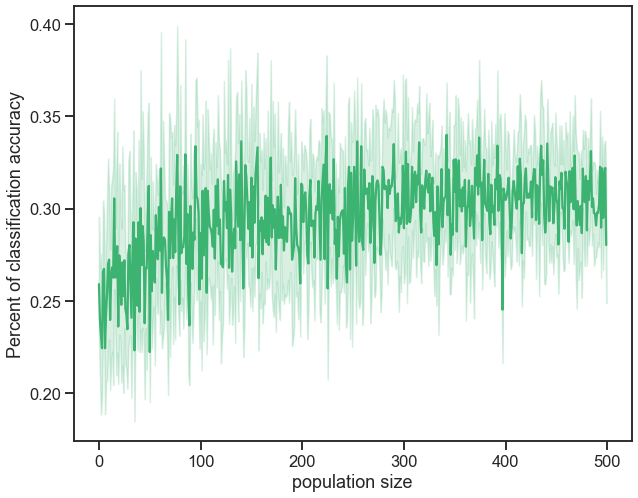

In [48]:
swintesttGreenn = swintestP.transpose(1,0)
dataframe1 = PlotMeanwConfidence(array=swintesttGreenn)

plt.figure(figsize=(10,8))
sns.lineplot(x="x", y="Dff", data=dataframe1, color = 'mediumseagreen')
plt.xlabel('population size')
plt.ylabel('Percent of classification accuracy')
# plt.ylim(0.1,0.30)

In [ ]:
testswin= SVMrandselectcellsNEW(X=X, y=y, numcells=numcells, n_splits=20, n_repeats=2)

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(data=swintestt.mean(0), color = 'rosybrown')
plt.xlabel('population size')
plt.ylabel('Percent of classification accuracy')
# plt.ylim(0,0.8)
# plt.hlines(0.125,0,924, linestyles='dashed')

In [ ]:
swintesttmPFC= swintestt

In [ ]:
swintesttmPFCC = swintesttmPFC.transpose(1,0)
swintesttOBB = swintesttOB.transpose(1,0)

In [ ]:

# swintesttGreen = swintesttGreen.transpose(1,0)
# swintesttRedd = swintesttRed.transpose(1,0)
dataframe1 = PlotMeanwConfidence(array=swintesttGreen)
dataframe2 = PlotMeanwConfidence(array=swintesttRedd)
dataframe3 = PlotMeanwConfidence(array=swintesttOBB)
dataframe4 = PlotMeanwConfidence(array=swintesttmPFCC)
plt.figure(figsize=(10,8))
sns.lineplot(x="x", y="Dff", data=dataframe1, color = 'mediumseagreen')
sns.lineplot(x="x", y="Dff", data=dataframe2, color = 'mediumpurple')
sns.lineplot(x="x", y="Dff", data=dataframe3, color = 'firebrick')
sns.lineplot(x="x", y="Dff", data=dataframe4, color = 'royalblue')
plt.xlabel('population size')
plt.ylabel('Percent of classification accuracy')
# plt.ylim(0.1,0.50)
# plt.xlim(0,80)
plt.hlines(0.125,0,152, linestyles='dashed')
FOLDER_PATH = '/Users/sdaste/Desktop/DATA/BIG_ANALYSIS'
path22 = os.path.join(FOLDER_PATH, "SVM_pop_Greenall_purplemPFCOB_redOB_bluemPFC.pdf")
plt.savefig(path22, transparent = True, dpi = 600, bbox_inches='tight')

In [ ]:
swintesttGreenn = swintesttRed.transpose(1,0)
swintesttRedd = swintesttGreen.transpose(1,0)
dataframe1 = PlotMeanwConfidence(array=swintesttGreenn)
dataframe2 = PlotMeanwConfidence(array=swintesttRedd)
plt.figure(figsize=(10,8))
sns.lineplot(x="x", y="Dff", data=dataframe1, color = 'mediumseagreen')
sns.lineplot(x="x", y="Dff", data=dataframe2, color = 'firebrick')
plt.xlabel('population size')
plt.ylabel('Percent of classification accuracy')
# plt.ylim(0.1,0.30)
plt.hlines(0.11,0,30, linestyles='dashed')
FOLDER_PATH = '/Volumes/Extreme Pro/DATA/2P/20210427_Exp_Conc/#644/analysis/Results'
path22 = os.path.join(FOLDER_PATH, "SVM_pop_Green_Red.pdf")
plt.savefig(path22, transparent = True, dpi = 600, bbox_inches='tight')

In [ ]:
respsGreen0_513.shape

In [ ]:
resps_LS = respsGreen00.transpose(2,1,0)
LS_list = getLS(resps_LS, No=20)
plot = sns.histplot(LS_list, bins = 10,fill=True,color='mediumseagreen',linewidth=2, stat='probability')
# plt.title('Lifetime Sparseness')
plt.xlabel('Lifetime Sparseness')
plt.ylabel('Fraction of Neurons')
# plt.xlim(0,1)
plt.ylim(0,0.35)

# FOLDER_PATH = '/Users/sdaste/Desktop/DATA/BIG_ANALYSIS'
# path22 = os.path.join(FOLDER_PATH, "LS_green_hist.pdf")
# plt.savefig(path22, transparent = True, dpi = 600, bbox_inches='tight')

In [ ]:
plt.figure(figsize=(4,8))
sns.swarmplot(data=[d for d in LS_list.T], color="mediumseagreen",size=4)
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            data=[d for d in LS_list.T],
            showfliers=False,
            showbox=False,
            showcaps=False)
plt.ylim(0,1.0)
FOLDER_PATH = '/Volumes/WD_BLACK/Simon/Figures/Average Mice'
path22 = os.path.join(FOLDER_PATH, "LS_all_plot.pdf")
plt.savefig(path22, transparent = True, dpi = 600, bbox_inches='tight')

In [ ]:
sns.boxplot(data=[d for d in LS_list.T], color="mediumpurple", saturation=1, width=0.1, linewidth=3, )

In [ ]:
PS1 = getPS_abs(respsGreen0, No=5)
PS2 = getPS_abs(respsGreen1, No=4)
PS3 = getPS_abs(respsGreen2, No=4)
# PS4 = getPS_abs(respsGreen, No=8)
sns.kdeplot(PS1, color = 'b') 
sns.kdeplot(PS2, color = 'r') 
sns.kdeplot(PS3, color = 'rosybrown') 
# sns.kdeplot(PS4, color = 'g') 

In [ ]:
PS1 = getPS_abs(respsGreen00, No=4)
plt.figure(figsize=(4,8))
sns.swarmplot(data=[d for d in PS1.T], color="mediumseagreen",size=6)
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            data=[d for d in PS1.T],
            showfliers=False,
            showbox=False,
            showcaps=False)
plt.ylim(0,1)
FOLDER_PATH = '/Volumes/WD_BLACK/Simon/Figures/Average Mice'
path22 = os.path.join(FOLDER_PATH, "PS_all_plot.pdf")
plt.savefig(path22, transparent = True, dpi = 300, bbox_inches='tight')